In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

**About Dataset:**

* Two major sources that assess and publish global population are : the United Nations and the U.S. Census Bureau

* The United Nations Population Division of the Department of Economic and Social Affairs every two years calculates, updates, and publishes estimates of total population in its World Population Prospects series 

* These population estimates and projections provide the standard and consistent set of population figures that are used throughout the United Nations system

**Present Dataset contains list of 205 countries including dependent territories**

* Dependent territory also known as dependent area, or dependency or an external territory is a territory that does not possess full political independence or sovereignty as a sovereign state, yet remains politically outside the controlling state's integral area

* Rank allocated to each country and dependencies are according to their population size by United Nations

* Dataset contains nine columns which hold information for each country and dependent territory

**Columns:**

* **country name** : Names of 205 countries including dependent terroitories in the world
* **current population** : current population i.e population as of January 2023
* **population 2022**: population for the previous year i.e. 2022
* **area**: Area in kilometer square (km^2)
* **land area**: Land area in km^2
* **density**: Population density i.e. people per sq. km of land area in /km^2
* **growth rate**: Annual growth rate where +ve and -ve signs show an increase and decrease in growth rates respectively
* **world percentage**: share of each country in total world's population in terms of percentage
* **rank**: rank on the basis of population size, most populated country is assigned highest rank and so on

# 1. Importing and Understanding the Dataset

First process towards analysis is to have sufficient and proper understanding of dataset

**This step involves:**
* Installing openpyxl library for importing excel file
* Importing and reading excel file using pd.read_excel() method

In [41]:
import pandas as pd

In [42]:
# Installing openpyxl library

! pip install openpyxl

In [43]:
# Importing excel file
df = pd.read_excel(r"C:\Users\Admin\Downloads\world_population2023.xlsx")
df

,Unnamed: 0,country name,current population,population 2022,area,land area,density,growth rate,world percentage,rank
0,0,India,"1,423,118,510","1,417,173,173",3.3M,3M,481,0.81%,17.85%,1
1,1,China,"1,425,820,141","1,425,887,337",9.7M,9.4M,151,-0.02%,17.81%,2
2,2,United States,"339,231,549","338,289,857",9.4M,9.1M,37,0.50%,4.25%,3
3,3,Indonesia,"276,576,867","275,501,339",1.9M,1.9M,148,0.74%,3.47%,4
4,4,Pakistan,"238,517,163","235,824,862",881.9K,770.9K,312,1.98%,3.00%,5
...,...,...,...,...,...,...,...,...,...,...
200,200,San Marino,"33,642","33,660",61,60,561,-0.05%,0.00%,218
201,201,Palau,"18,058","18,055",459,460,39,0.02%,0.00%,222
202,202,Nauru,"12,780","12,668",21,20,639,0.88%,0.00%,225
203,203,Tuvalu,"11,396","11,312",26,30,380,0.74%,0.00%,227


In [44]:
# Understanding dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          205 non-null    int64 
 1   country name        205 non-null    object
 2   current population  205 non-null    object
 3   population 2022     205 non-null    object
 4   area                205 non-null    object
 5   land area           205 non-null    object
 6   density             205 non-null    object
 7   growth rate         205 non-null    object
 8   world percentage    204 non-null    object
 9   rank                205 non-null    int64 
dtypes: int64(2), object(8)
memory usage: 16.1+ KB


**,info() indicates that **
* There are total 205 entries in each column ,except for world percentage column which contains 204 entries with one null value
* Datatype assigned to most of the columns are object.
* However the records in these columns are quantitative, so we can update them to int and float datatype

In [45]:
df[df["world percentage"].isnull()]

,Unnamed: 0,country name,current population,population 2022,area,land area,density,growth rate,world percentage,rank
204,204,Vatican City,518,510,< 1,< 1,"1,177",1.57%,NaN,234


# 2. Data Preparation and Cleaning

Primary aim of data preparation and cleaning is to enhance the quality of dataset

Followings steps will be employed here :

* Replacing or removing missing value based on the initial investigation by deploying isna()/drpna()/fillna() methods 
* Finding duplicate values by employing duplicated() and dropduplicate() methods
* Dropping unnecessary columns using drop() method
* Sorting of index for improving the performance by deploying sort_index() method
* Converting column names into title case using .str.title or apply() methods
* Renaming column name by using raname() method
* Replacing certain characters using .str.replace() method to convert them into numeric values
* Updating row values using .loc() accessor


In [46]:
# Checking for null values
mask = df["world percentage"].isna()

In [47]:
# Boolean masking
df[mask]

,Unnamed: 0,country name,current population,population 2022,area,land area,density,growth rate,world percentage,rank
204,204,Vatican City,518,510,< 1,< 1,"1,177",1.57%,NaN,234


In [48]:
# Index 204 contains a null value in world percentage column
# Replacing NaN with 0
df["world percentage"].fillna(0,inplace = True)

In [49]:
# Finding duplicate values
df[df.duplicated()]  # No duplicate value present in dataset

,Unnamed: 0,country name,current population,population 2022,area,land area,density,growth rate,world percentage,rank


In [50]:
# Drooping column
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [51]:
# Sorting index
df.sort_index(inplace = True)

In [52]:
# Coverting column names into title case
df.columns = df.columns.str.title()

In [53]:
df

,Country Name,Current Population,Population 2022,Area,Land Area,Density,Growth Rate,World Percentage,Rank
0,India,"1,423,118,510","1,417,173,173",3.3M,3M,481,0.81%,17.85%,1
1,China,"1,425,820,141","1,425,887,337",9.7M,9.4M,151,-0.02%,17.81%,2
2,United States,"339,231,549","338,289,857",9.4M,9.1M,37,0.50%,4.25%,3
3,Indonesia,"276,576,867","275,501,339",1.9M,1.9M,148,0.74%,3.47%,4
4,Pakistan,"238,517,163","235,824,862",881.9K,770.9K,312,1.98%,3.00%,5
...,...,...,...,...,...,...,...,...,...
200,San Marino,"33,642","33,660",61,60,561,-0.05%,0.00%,218
201,Palau,"18,058","18,055",459,460,39,0.02%,0.00%,222
202,Nauru,"12,780","12,668",21,20,639,0.88%,0.00%,225
203,Tuvalu,"11,396","11,312",26,30,380,0.74%,0.00%,227


In [54]:
df.columns

Index(['Country Name', 'Current Population', 'Population 2022', 'Area',
       'Land Area', 'Density', 'Growth Rate', 'World Percentage', 'Rank'],
      dtype='object')

In [56]:
# Renaming fe more columns 

df.rename(columns = {"Country Name":"Country" , 'Current Population':"Population 2023",
                    'Area':'Area(km²)' ,'Land Area':'Land Area(km²)',
                   'Density':'Density (/km²)' , 'World Percentage':'World %'},inplace = True)
df.head()


,Country,Population 2023,Population 2022,Area(km²),Land Area(km²),Density (/km²),Growth Rate,World %,Rank
0,India,"1,423,118,510","1,417,173,173",3.3M,3M,481,0.81%,17.85%,1
1,China,"1,425,820,141","1,425,887,337",9.7M,9.4M,151,-0.02%,17.81%,2
2,United States,"339,231,549","338,289,857",9.4M,9.1M,37,0.50%,4.25%,3
3,Indonesia,"276,576,867","275,501,339",1.9M,1.9M,148,0.74%,3.47%,4
4,Pakistan,"238,517,163","235,824,862",881.9K,770.9K,312,1.98%,3.00%,5


In [62]:
# Replacing "," and "%" 

df["Population 2023"]= df["Population 2023"].str.replace(',','')
df["Population 2022"]=df["Population 2022"].str.replace(',','')
df["Growth Rate"]=df["Growth Rate"].str.replace('%','')
df["World %"]=df["World %"].str.replace('%','')
df["Density (/km²)"]=df["Density (/km²)"].str.replace(',','')

In [63]:
df.head()

,Country,Population 2023,Population 2022,Area(km²),Land Area(km²),Density (/km²),Growth Rate,World %,Rank
0,India,1423118510,1417173173,3.3M,3M,481,0.81,17.85,1
1,China,1425820141,1425887337,9.7M,9.4M,151,-0.02,17.81,2
2,United States,339231549,338289857,9.4M,9.1M,37,0.50,4.25,3
3,Indonesia,276576867,275501339,1.9M,1.9M,148,0.74,3.47,4
4,Pakistan,238517163,235824862,881.9K,770.9K,312,1.98,3.00,5


* As the population of India exceeded population of China in Jan,2023 , Row value of Population 2023 and Growth Rate columns for India needs to be updated

In [ ]:
# Changing row value of Population 2023 using .loc accessor
# df.loc[0,"Population 2023"] = 1429834379
# df.loc[0,"Growth Rate"]= 0.91

In [64]:
df.head()

,Country,Population 2023,Population 2022,Area(km²),Land Area(km²),Density (/km²),Growth Rate,World %,Rank
0,India,1423118510,1417173173,3.3M,3M,481,0.81,17.85,1
1,China,1425820141,1425887337,9.7M,9.4M,151,-0.02,17.81,2
2,United States,339231549,338289857,9.4M,9.1M,37,0.50,4.25,3
3,Indonesia,276576867,275501339,1.9M,1.9M,148,0.74,3.47,4
4,Pakistan,238517163,235824862,881.9K,770.9K,312,1.98,3.00,5


# 3. Typecasting

Typecasting is a way of converting datatypes of columns into relevant datatypes.
It leads to reduction in memory usage and improved performance

* Quantitative columns like, Population 2023, Population 2022,Growth Rate,World % columns are of object datatype
* Its better to convert them into numeric datatype by using astype() method

In [65]:
# Converting to numeric datatypes
df = df.astype({'Population 2023':'int','Population 2022':'int','Growth Rate': 'float', 'World %': 'float',"Density (/km²)":"float"},errors = "raise")

In [66]:
# Checking datatypes of columns after conversion
df.dtypes

Country             object
Population 2023      int32
Population 2022      int32
Area(km²)           object
Land Area(km²)      object
Density (/km²)     float64
Growth Rate        float64
World %            float64
Rank                 int64
dtype: object

In [67]:
df.info()  # Memory usage has substantially reduced after typecasting

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          205 non-null    object 
 1   Population 2023  205 non-null    int32  
 2   Population 2022  205 non-null    int32  
 3   Area(km²)        205 non-null    object 
 4   Land Area(km²)   205 non-null    object 
 5   Density (/km²)   205 non-null    float64
 6   Growth Rate      205 non-null    float64
 7   World %          204 non-null    float64
 8   Rank             205 non-null    int64  
dtypes: float64(3), int32(2), int64(1), object(3)
memory usage: 12.9+ KB


# 4. Exploratory Data Analysis and Visualization

* Exploratory data analysis is a vital component through which we explore and extract valuable insights and hidden patterns in a dataset
* It employs Descriptive analysis and visualization methods 

**1. Statistical Analysis**

In [68]:
# Deploying .decribe() method to obtain aggegated values of numeric columns
# Deploying T attribute to Transpose rows and columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Population 2023,205.0,3.907452e+07,1.458696e+08,518.00,1480242.00,7590327.000,28570189.00,1.425820e+09
Population 2022,205.0,3.888173e+07,1.455222e+08,510.00,1472233.00,7529475.000,28160542.00,1.425887e+09
Density (/km²),205.0,3.440592e+02,1.482715e+03,0.14,35.00,95.000,235.00,1.814900e+04
Growth Rate,205.0,1.064878e+00,1.277604e+00,-7.45,0.31,0.890,1.92,4.980000e+00
World %,204.0,4.925490e-01,1.830375e+00,0.00,0.02,0.105,0.36,1.785000e+01
Rank,205.0,1.043512e+02,6.158514e+01,1.00,52.00,103.000,154.00,2.340000e+02


**Following points can be inferred:**

* Dataset contains facts and figures regarding population of 205 countries and dependencies for Years 2022 and 2023
* Rank to each country is assigned as per their population
* Country with rank 1 is designated as most populous country
* Growth rate ranges from -7.45 to 4.92.
* Positive growth rate denotes increase in population 
* Negative growth rate signifies that a population size of a particular country got smaller
* Most crowded country accounts for 17.85 percentage of world's total population

**2. Visualization**

Importing matplotlib and seaborn libraries for visualizing data through various interactive plots
* Matplotlib plots various graphs using Pandas and Numpy
* Seaborn is the extended version of Matplotlib, which uses Matplotlib, Numpy, and Pandas to plot graphs

In [69]:
# Importing matplotlib and seaborn
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

C:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**a. Growth rates of top ten highly populated countries**

In [72]:
# Employing .head() method to retrieve top 10 records
m1 = df.head(10)
m1

,Country,Population 2023,Population 2022,Area(km²),Land Area(km²),Density (/km²),Growth Rate,World %,Rank
0,India,1423118510,1417173173,3.3M,3M,481.0,0.81,17.85,1
1,China,1425820141,1425887337,9.7M,9.4M,151.0,-0.02,17.81,2
2,United States,339231549,338289857,9.4M,9.1M,37.0,0.50,4.25,3
3,Indonesia,276576867,275501339,1.9M,1.9M,148.0,0.74,3.47,4
4,Pakistan,238517163,235824862,881.9K,770.9K,312.0,1.98,3.00,5
5,Nigeria,221592544,218541212,923.8K,910.8K,246.0,2.41,2.80,6
6,Brazil,215904975,215313498,8.5M,8.4M,26.0,0.52,2.70,7
7,Bangladesh,172220907,171186372,147.6K,130.2K,1329.0,1.03,2.16,8
8,Russia,144652401,144713314,17.1M,16.4M,9.0,-0.19,1.80,9
9,Mexico,128061868,127504125,2M,1.9M,66.0,0.75,1.60,10


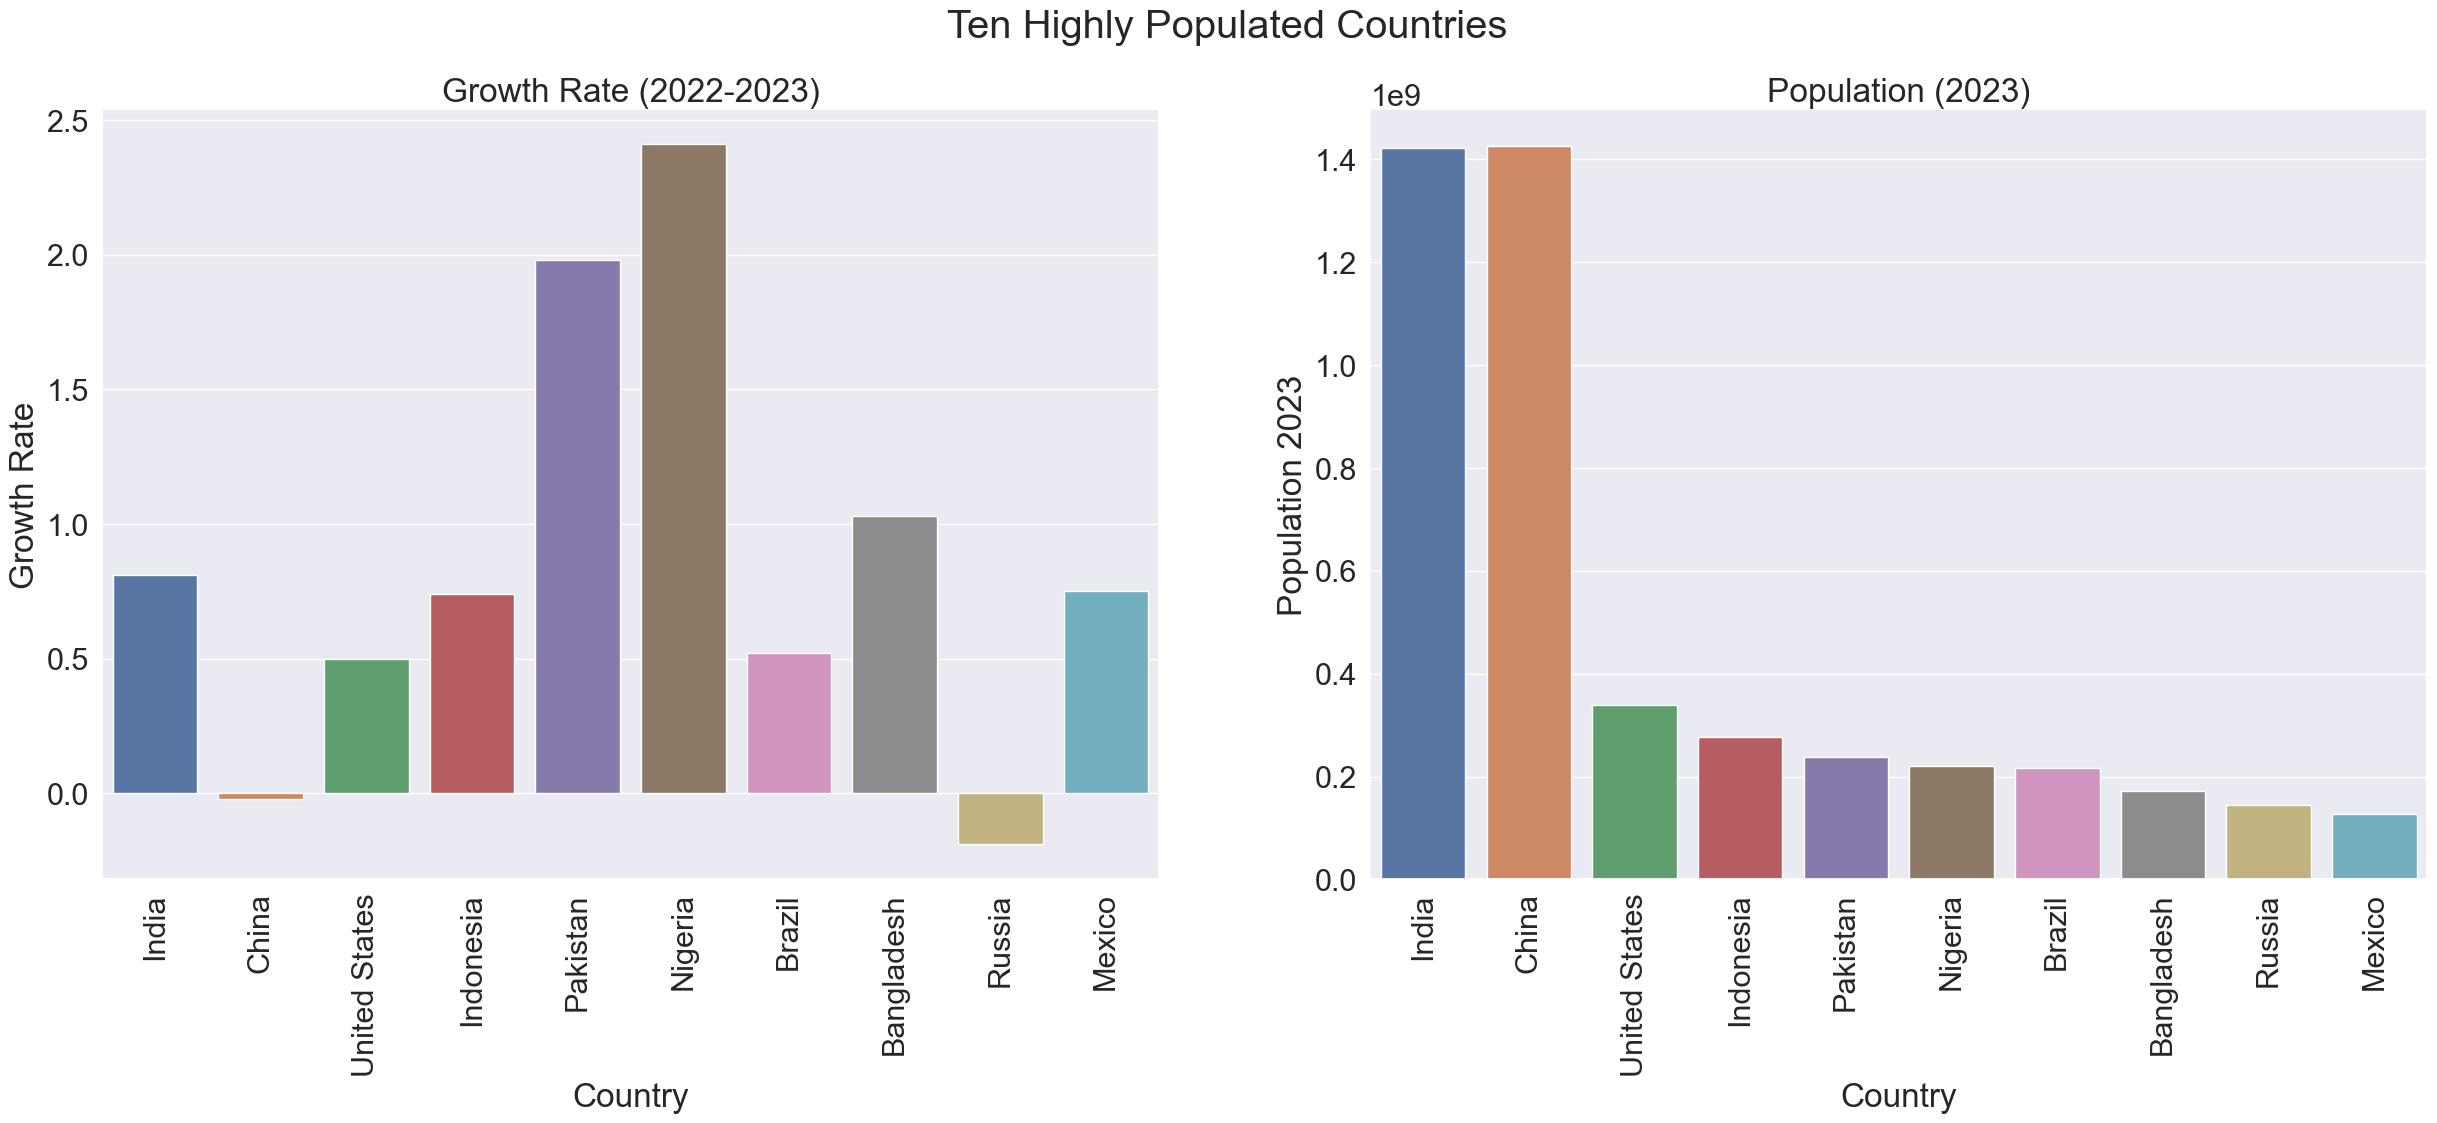

In [73]:
# Plotting barplots to depict relationship between current population and rowth rates of top 10 heavily populated countries
sns.set(font_scale=2)
fig, ax =plt.subplots(1,2,figsize = (30,10))

sns.barplot( x = "Country", y = "Growth Rate",data = m1, ax=ax[0])
sns.barplot(x ="Country",y = "Population 2023",data =m1, ax=ax[1])

ax[0].set_title ("Growth Rate (2022-2023)")
ax[1].set_title("Population (2023)")


ax[0].set_xticklabels(labels = m1["Country"],rotation=90)
ax[1].set_xticklabels(labels = m1["Country"],rotation=90)

plt.suptitle ("Ten Highly Populated Countries")
plt.show()

**Looking at the growth rates of top 10 highly populated nations:** 

* Occupants of Nigeria and Pakistan are increased by 2.41 and 1.98 percentage respectively
* China and Russia, on the other hand, houses less residents in the Year 2023 as compared to the year 2022

**b. Growth rates of bottom ten least populated countries**

In [74]:
# Employing .tail() method to retrieve bottom 10 records
df["World %"] = df["World %"].fillna(0)
l1= df.tail(10)
l1

,Country,Population 2023,Population 2022,Area(km²),Land Area(km²),Density (/km²),Growth Rate,World %,Rank
195,Greenland,56643,56466,2.2M,410.4K,0.14,0.31,0.0,208
196,Saint Kitts And Nevis,47755,47657,261,260,184.00,0.21,0.0,211
197,Marshall Islands,41996,41569,181,180,233.00,1.03,0.0,215
198,Liechtenstein,39584,39327,160,160,247.00,0.65,0.0,216
199,Monaco,36297,36469,2,2,18149.00,-0.47,0.0,217
200,San Marino,33642,33660,61,60,561.00,-0.05,0.0,218
201,Palau,18058,18055,459,460,39.00,0.02,0.0,222
202,Nauru,12780,12668,21,20,639.00,0.88,0.0,225
203,Tuvalu,11396,11312,26,30,380.00,0.74,0.0,227
204,Vatican City,518,510,< 1,< 1,1177.00,1.57,0.0,234


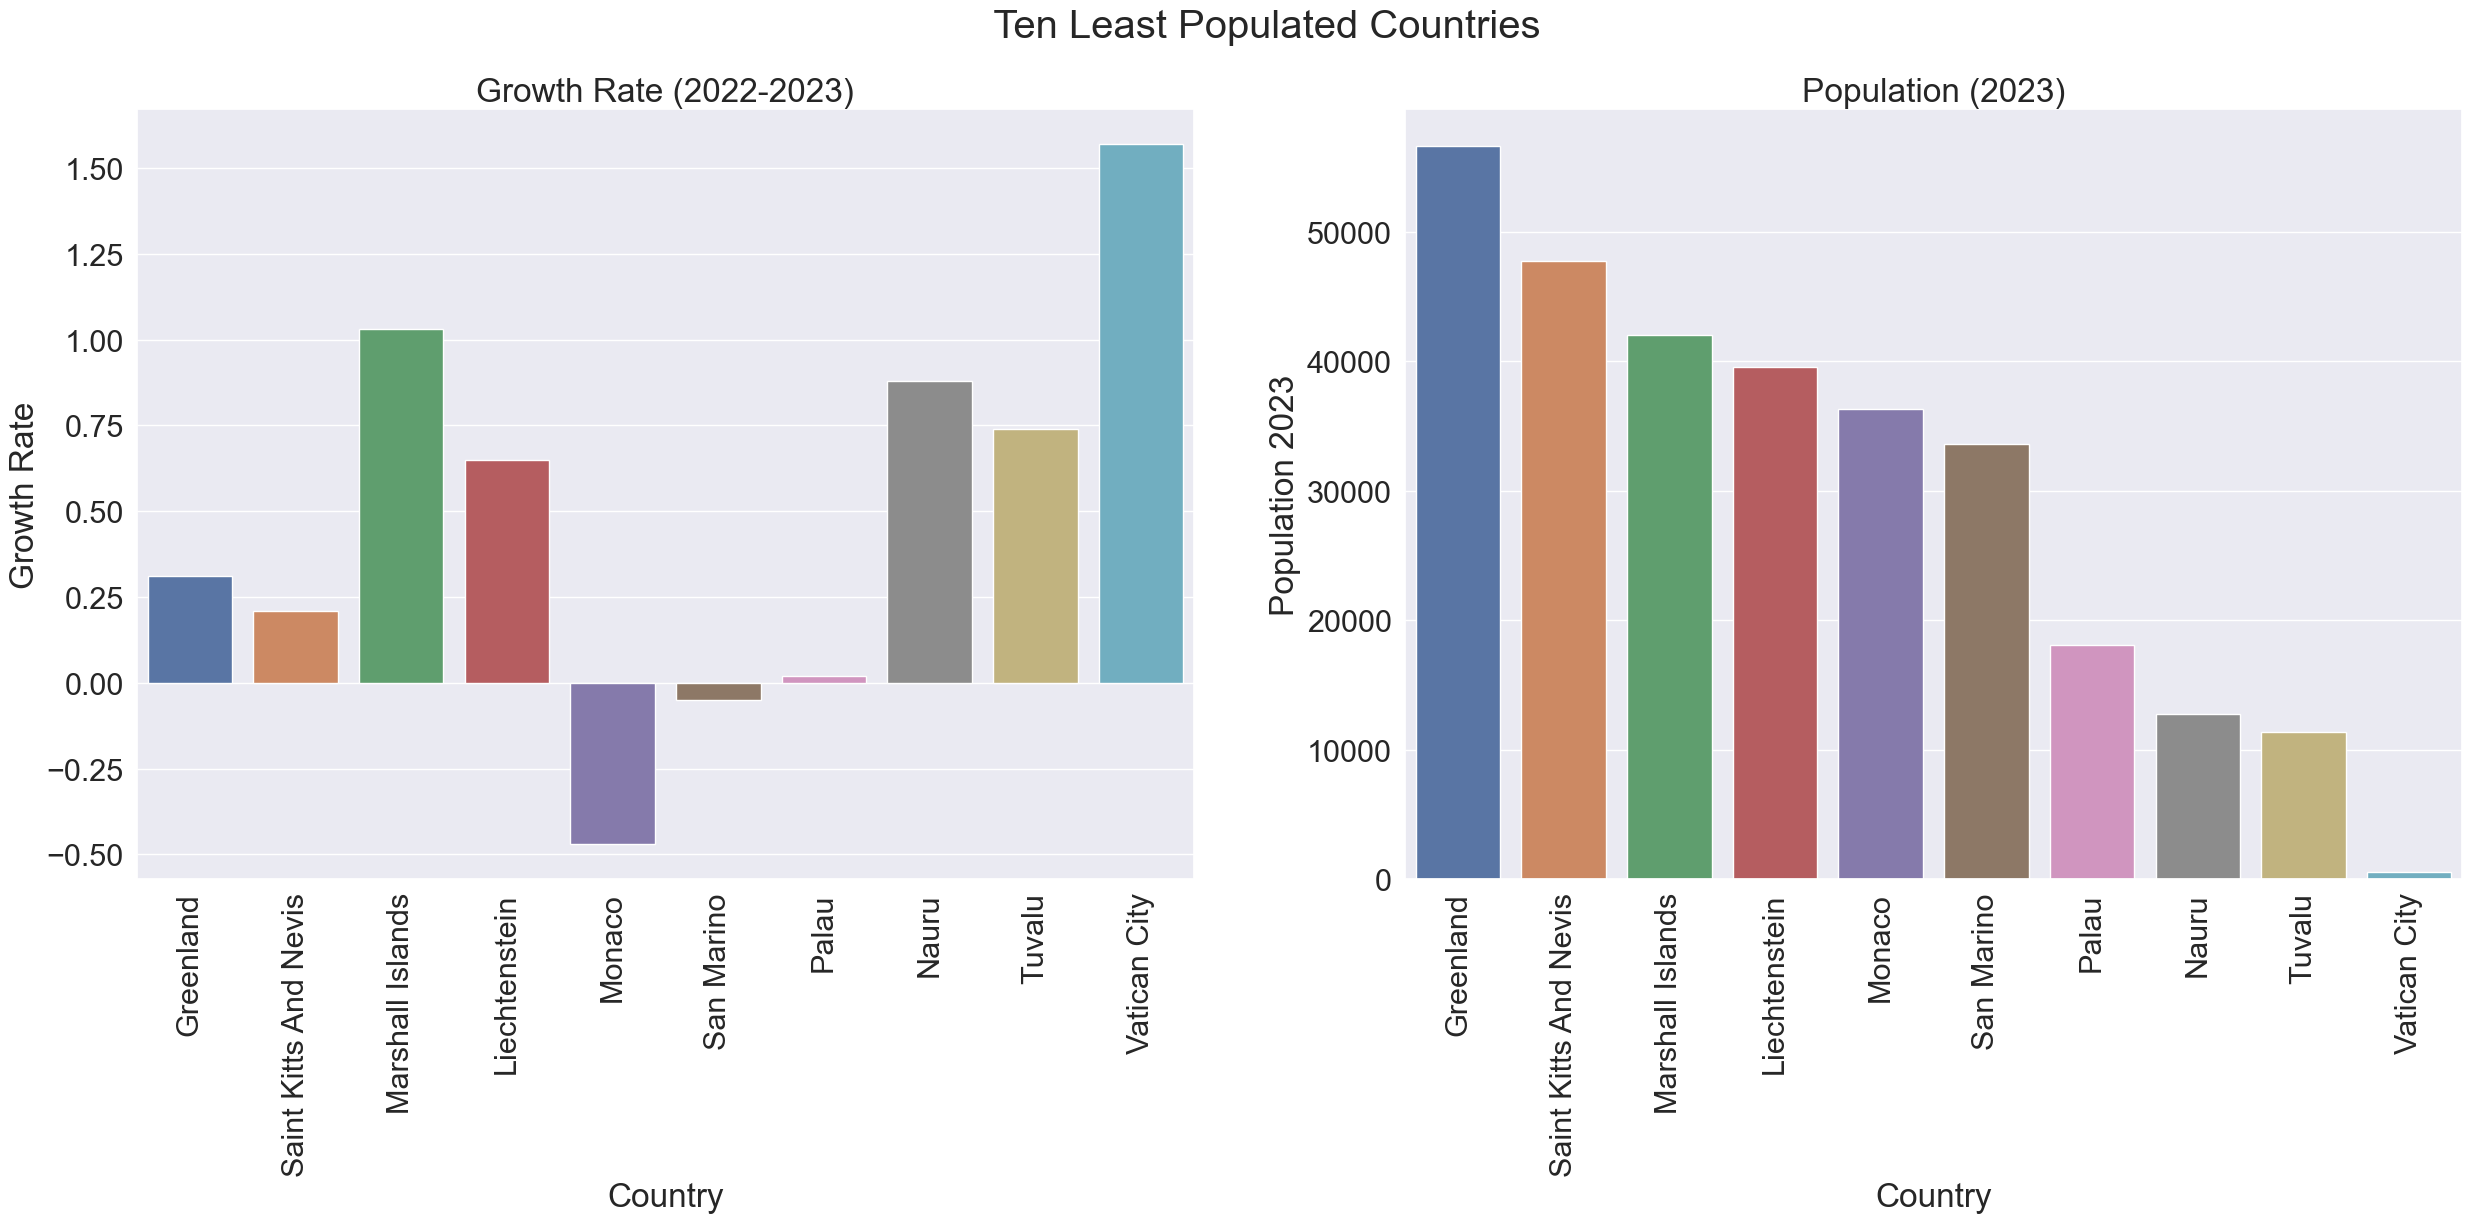

In [75]:
# Plotting barplots to depict relationship between current population and growth rates of top 10 least populous contries
sns.set(font_scale=2)

fig, ax =plt.subplots(1,2,figsize = (30,10))

sns.barplot( x = "Country", y = "Growth Rate",data = l1, ax=ax[0])

sns.barplot(x ="Country",y = "Population 2023",data =l1, ax=ax[1])

ax[0].set_title ("Growth Rate (2022-2023)")
ax[1].set_title("Population (2023)")
ax[0].set_xticklabels(labels = l1["Country"],rotation=90)
ax[1].set_xticklabels(labels = l1["Country"],rotation=90)
plt.suptitle (" Ten Least Populated Countries")
plt.show()

**Facts and figures illustrate that :**

* Vatican city, tiniest country in the world, shows a climb in growth rate by 1.57 percentage
* Monaco's(dependent territory) and San Marino's population size has futher shrinked by 0.47 and 0.05 percentage


# 5. Asking and Answering Questions

**a. What are the countries and dependencies with positive growth rates ?**

In [76]:
p_g = df[df["Growth Rate"] >0].sort_values("Growth Rate",ignore_index = True, ascending = False)
p_g

,Country,Population 2023,Population 2022,Area(km²),Land Area(km²),Density (/km²),Growth Rate,World %,Rank
0,Moldova,3487283,3272996,33.8K,32.9K,104.0,4.98,0.04,134
1,Syria,22754313,22125249,185.2K,183.6K,126.0,4.98,0.29,60
2,Niger,26780177,26207977,1.3M,1.3M,21.0,3.80,0.34,54
3,Dr Congo,100880253,99010212,2.3M,2.3M,45.0,3.29,1.28,15
4,Chad,18044193,17723315,1.3M,1.3M,15.0,3.13,0.23,67
...,...,...,...,...,...,...,...,...,...
168,Hong Kong,7488976,7488865,1.1K,1.1K,7135.0,0.04,0.09,104
169,Palau,18058,18055,459,460,39.0,0.02,0.00,222
170,Guadeloupe,395839,395752,1.6K,1.6K,243.0,0.02,0.00,178
171,Czech Republic,10491345,10493986,78.9K,77.2K,136.0,0.01,0.13,89


[]

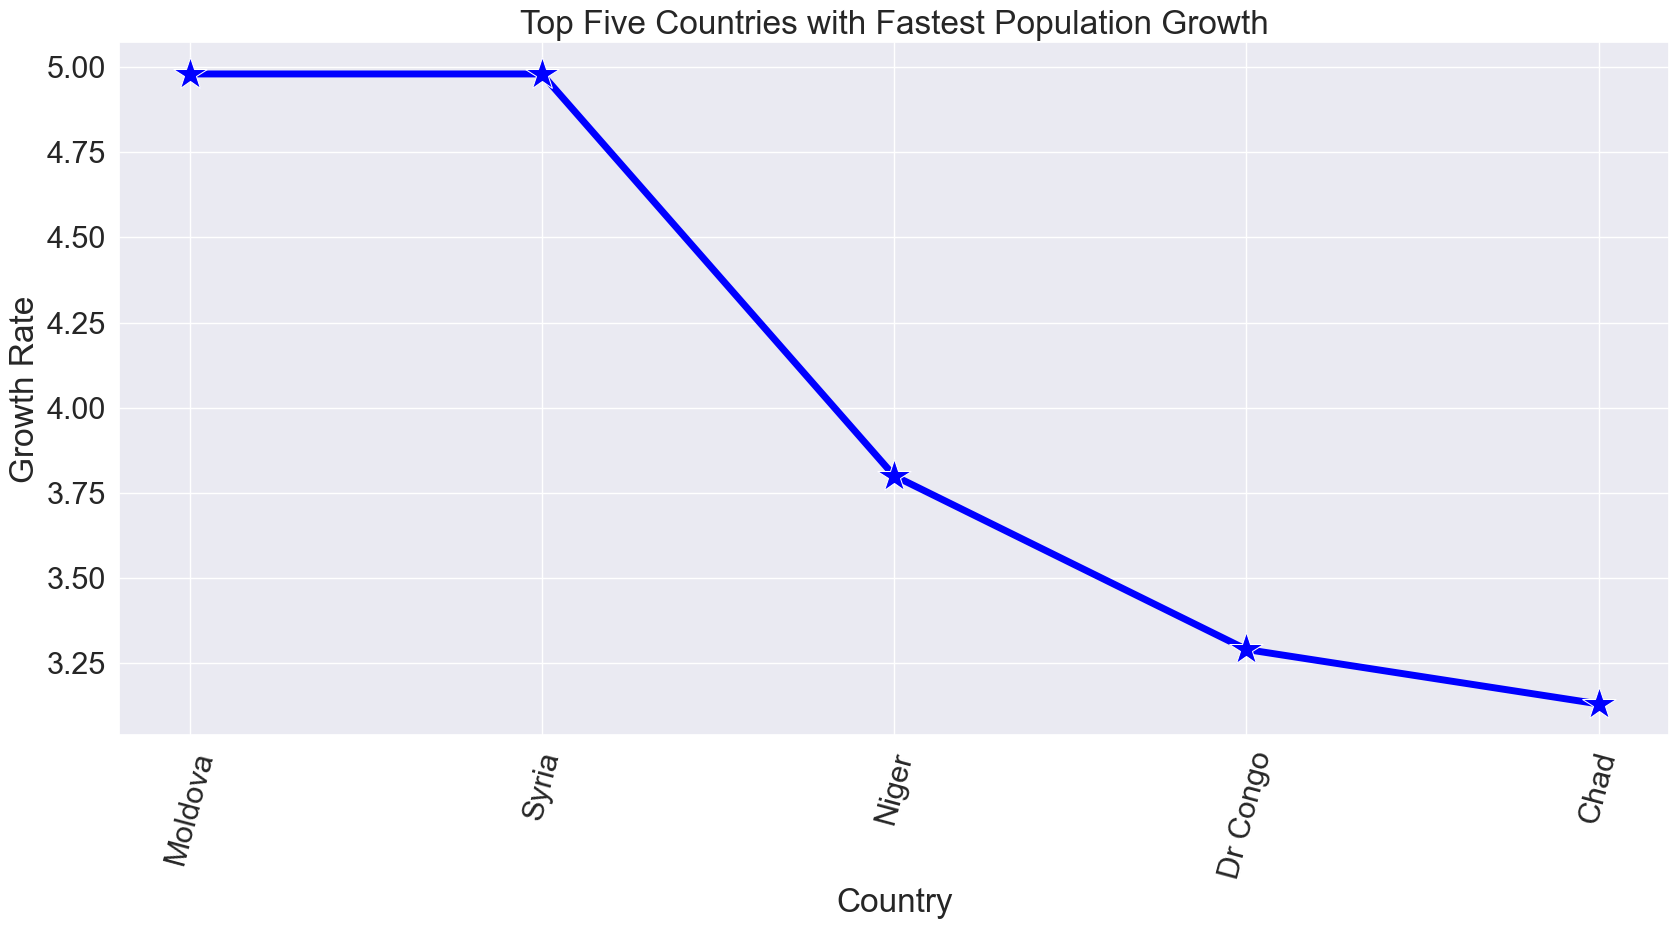

In [78]:
# Plotting lineplot to demostrate growth rate of top 5 fastest growing countries in terms of population size
plt.figure(figsize =(20,9))
sns.lineplot(data = p_g.head(), x = "Country",y = "Growth Rate",marker = "*", color = "blue",markersize=25 ,linewidth=5)
plt.xticks(rotation =75)
plt.title("Top Five Countries with Fastest Population Growth")
plt.plot()

**From the above analysis we can assess that :**

Moldova and Syria are the top two countries with the elevated growth rate of 4.98 percentage

**b. What are the countries and dependencies with negative growth rates ?**

In [79]:
n_g = df[df["Growth Rate"] <0].sort_values("Growth Rate",ignore_index = True)
n_g

,Country,Population 2023,Population 2022,Area(km²),Land Area(km²),Density (/km²),Growth Rate,World %,Rank
0,Ukraine,36181079,39701739,603.5K,579.4K,63.0,-7.45,0.46,41
1,Lebanon,5413182,5489739,10.5K,10.2K,523.0,-2.47,0.07,122
2,Bulgaria,6723268,6781953,110.9K,108.6K,62.0,-1.39,0.08,110
3,Lithuania,2728886,2750055,65.3K,62.6K,43.0,-1.15,0.03,142
4,Latvia,1838111,1850651,64.6K,62.2K,29.0,-1.10,0.02,151
5,Serbia,7175411,7221365,88.4K,87.5K,82.0,-1.00,0.09,105
6,Bosnia And Herzegovina,3218747,3233526,51.2K,51.2K,63.0,-0.70,0.04,137
7,Croatia,4017834,4030358,56.6K,56K,72.0,-0.54,0.05,130
8,Maldives,522338,523787,300,300,1737.0,-0.53,0.01,174
9,Japan,123569707,123951692,377.9K,364.5K,338.0,-0.53,1.54,12


[]

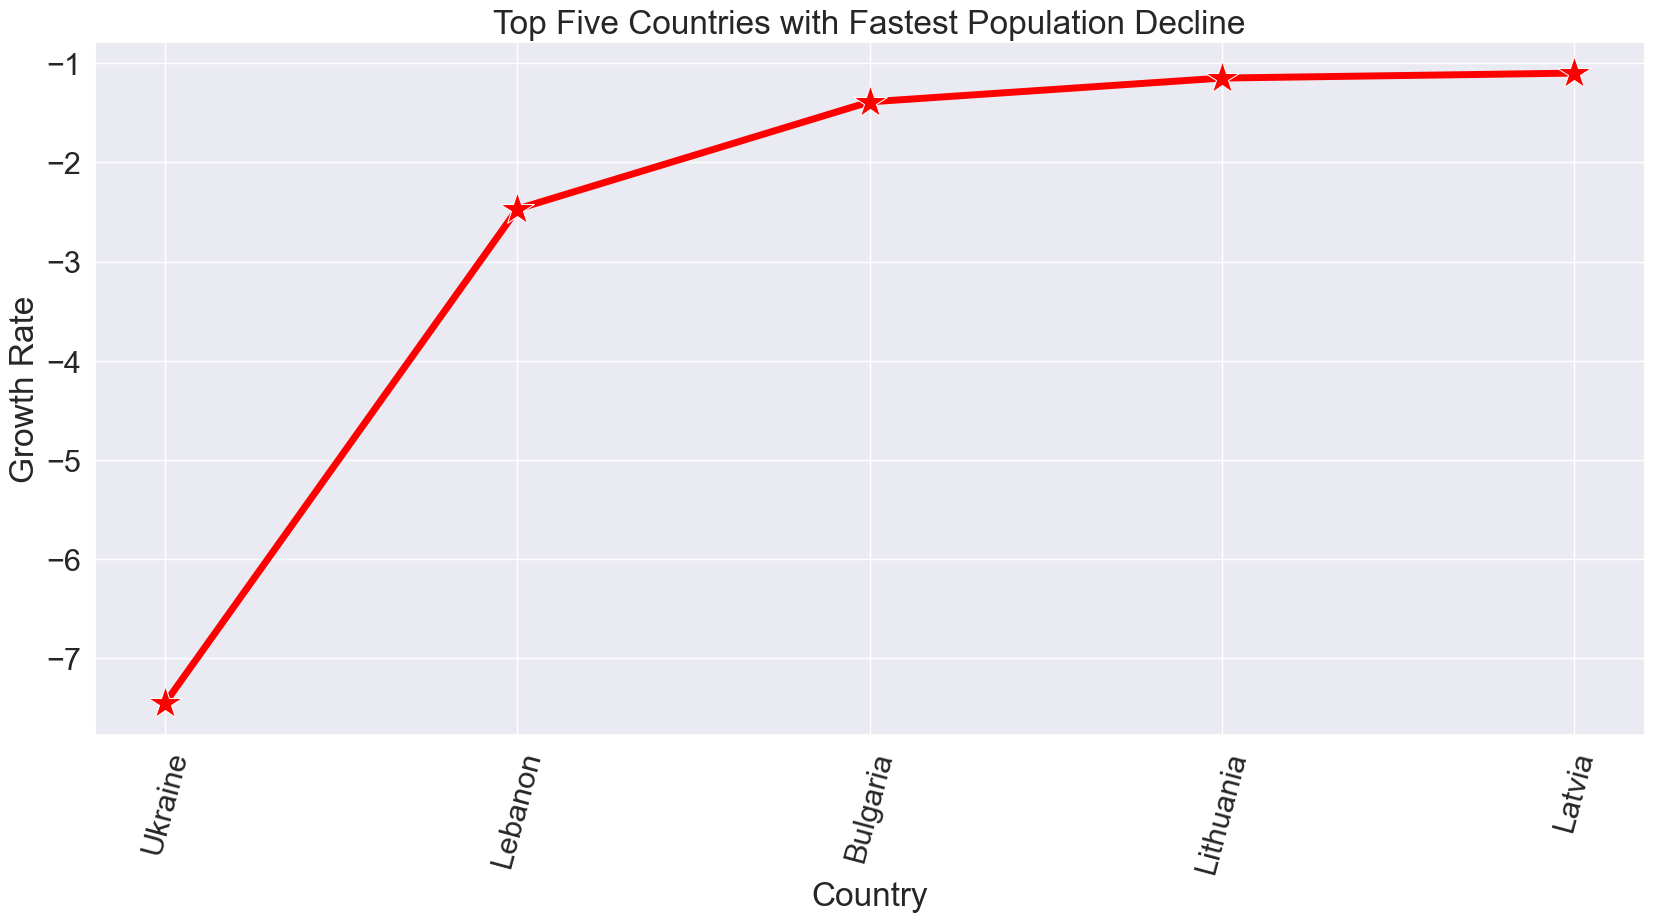

In [80]:
# Plotting lineplot to demostrate growth rate of top 5 fastest population decline
plt.figure(figsize =(20,9))
sns.lineplot(data = n_g.head(), x = "Country",y = "Growth Rate",marker = "*", color = "red",markersize=25 ,linewidth=5)
plt.xticks(rotation =75)
plt.title("Top Five Countries with Fastest Population Decline")
plt.plot()

**Above analysis clearly depicts that:**

* There are total 32 countries with negative growth rate
* Population of Ukrain has decreased tremendously by 7.45 percentage followed by Lebanon

**c. What are the countries with 100 million population ?**

In [82]:
 df[df["Population 2023"] > 100000000 ].sort_values("Rank",ignore_index = False)

,Country,Population 2023,Population 2022,Area(km²),Land Area(km²),Density (/km²),Growth Rate,World %,Rank
0,India,1423118510,1417173173,3.3M,3M,481.0,0.81,17.85,1
1,China,1425820141,1425887337,9.7M,9.4M,151.0,-0.02,17.81,2
2,United States,339231549,338289857,9.4M,9.1M,37.0,0.50,4.25,3
3,Indonesia,276576867,275501339,1.9M,1.9M,148.0,0.74,3.47,4
4,Pakistan,238517163,235824862,881.9K,770.9K,312.0,1.98,3.00,5
5,Nigeria,221592544,218541212,923.8K,910.8K,246.0,2.41,2.80,6
6,Brazil,215904975,215313498,8.5M,8.4M,26.0,0.52,2.70,7
7,Bangladesh,172220907,171186372,147.6K,130.2K,1329.0,1.03,2.16,8
8,Russia,144652401,144713314,17.1M,16.4M,9.0,-0.19,1.80,9
9,Mexico,128061868,127504125,2M,1.9M,66.0,0.75,1.60,10


* Total 15 countries in the world holds more than 100 million individuals
* India, China, United States, Indonesia and Pakistan are the top countries with more than 100 million population

**d. What are the top five highly and least densed countries or depedencies in the world?**

In [83]:
density =df.sort_values("Density (/km²)", ignore_index = True,ascending = False)
density

,Country,Population 2023,Population 2022,Area(km²),Land Area(km²),Density (/km²),Growth Rate,World %,Rank
0,Monaco,36297,36469,2,2,18149.00,-0.47,0.00,217
1,Singapore,5998922,5975689,710,718,8377.00,0.65,0.08,114
2,Hong Kong,7488976,7488865,1.1K,1.1K,7135.00,0.04,0.09,104
3,Bahrain,1480242,1472233,765,785,1892.00,0.90,0.02,154
4,Maldives,522338,523787,300,300,1737.00,-0.53,0.01,174
...,...,...,...,...,...,...,...,...,...
200,Australia,26329824,26177413,7.7M,7.7M,3.00,1.00,0.33,55
201,Namibia,2588371,2567012,825.6K,823.3K,3.00,1.45,0.03,145
202,Mongolia,3427406,3398366,1.6M,1.6M,2.00,1.44,0.04,133
203,Western Sahara,581992,575986,266K,266K,2.00,1.96,0.01,172


In [84]:
# Top 5 highly dense countries
d1 = density.head()
d1

,Country,Population 2023,Population 2022,Area(km²),Land Area(km²),Density (/km²),Growth Rate,World %,Rank
0,Monaco,36297,36469,2,2,18149.0,-0.47,0.00,217
1,Singapore,5998922,5975689,710,718,8377.0,0.65,0.08,114
2,Hong Kong,7488976,7488865,1.1K,1.1K,7135.0,0.04,0.09,104
3,Bahrain,1480242,1472233,765,785,1892.0,0.90,0.02,154
4,Maldives,522338,523787,300,300,1737.0,-0.53,0.01,174


In [85]:
# Top 5 least dense countries
d2 =density.tail()
d2

,Country,Population 2023,Population 2022,Area(km²),Land Area(km²),Density (/km²),Growth Rate,World %,Rank
200,Australia,26329824,26177413,7.7M,7.7M,3.00,1.00,0.33,55
201,Namibia,2588371,2567012,825.6K,823.3K,3.00,1.45,0.03,145
202,Mongolia,3427406,3398366,1.6M,1.6M,2.00,1.44,0.04,133
203,Western Sahara,581992,575986,266K,266K,2.00,1.96,0.01,172
204,Greenland,56643,56466,2.2M,410.4K,0.14,0.31,0.00,208


In [86]:
# Appending records of top 5 highly and least dense countries
d = d1.append(d2,ignore_index = True)
d

C:\Users\Admin\AppData\Local\Temp\ipykernel_14104\147292077.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  d = d1.append(d2,ignore_index = True)


,Country,Population 2023,Population 2022,Area(km²),Land Area(km²),Density (/km²),Growth Rate,World %,Rank
0,Monaco,36297,36469,2,2,18149.00,-0.47,0.00,217
1,Singapore,5998922,5975689,710,718,8377.00,0.65,0.08,114
2,Hong Kong,7488976,7488865,1.1K,1.1K,7135.00,0.04,0.09,104
3,Bahrain,1480242,1472233,765,785,1892.00,0.90,0.02,154
4,Maldives,522338,523787,300,300,1737.00,-0.53,0.01,174
5,Australia,26329824,26177413,7.7M,7.7M,3.00,1.00,0.33,55
6,Namibia,2588371,2567012,825.6K,823.3K,3.00,1.45,0.03,145
7,Mongolia,3427406,3398366,1.6M,1.6M,2.00,1.44,0.04,133
8,Western Sahara,581992,575986,266K,266K,2.00,1.96,0.01,172
9,Greenland,56643,56466,2.2M,410.4K,0.14,0.31,0.00,208


Text(0.5, 1.0, 'Relation Between Density and Population')

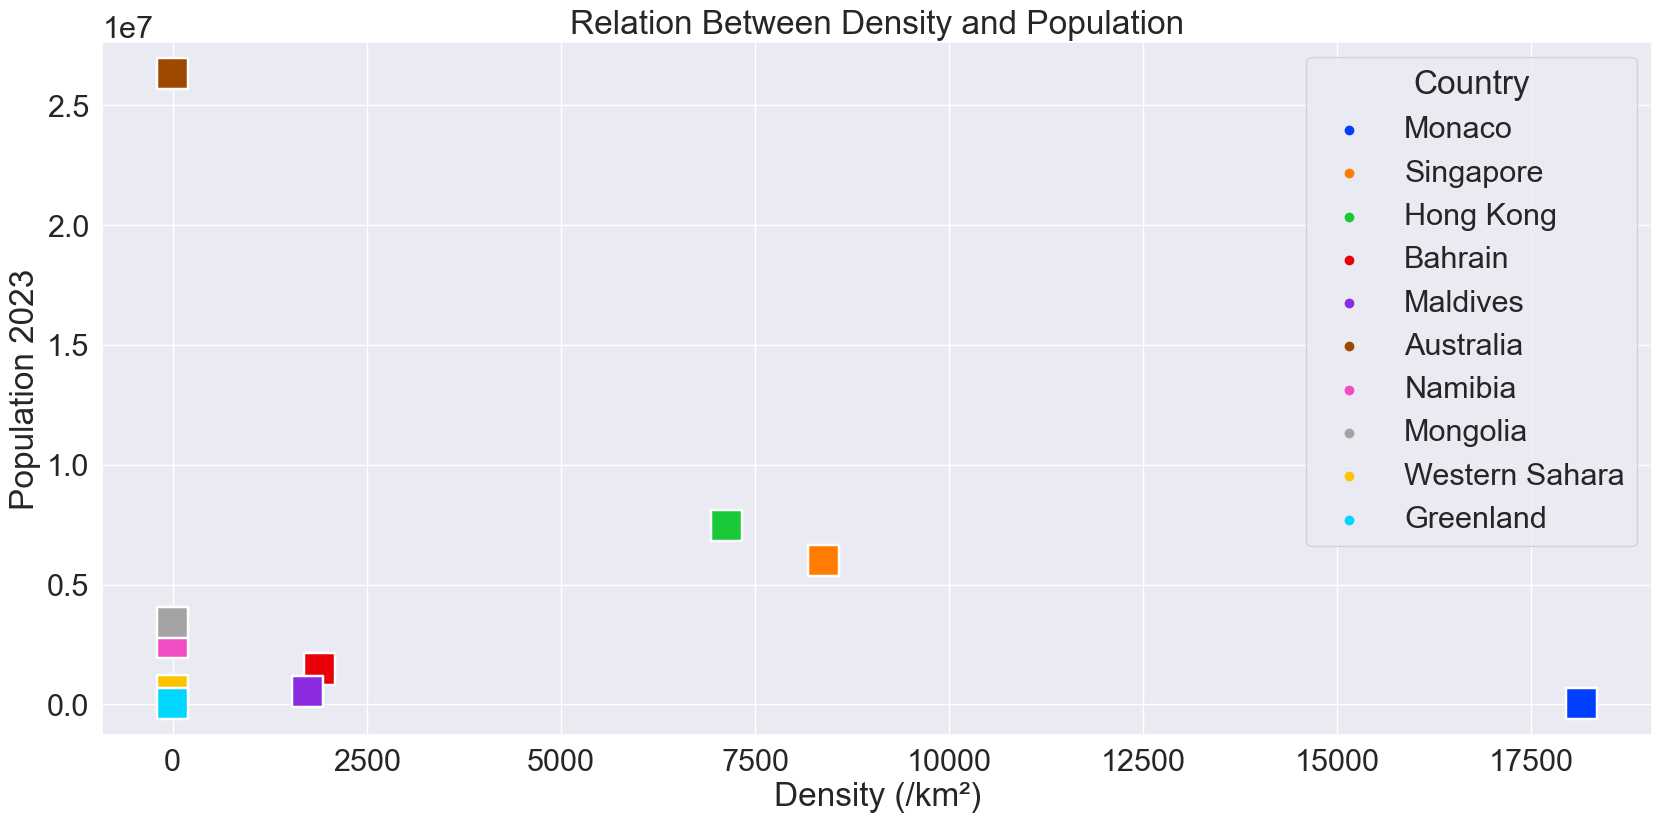

In [87]:
# Plotting scatterplot to explore relationship between Density and Population
plt.figure(figsize =(20,9))
sns.scatterplot( x = "Density (/km²)", y = "Population 2023",data = d, hue = "Country", s= 500,marker = "s",palette ="bright")
plt.title("Relation Between Density and Population")

Above plot displays the relationship between top five and bottom five countries in terms of population density and population size

**It illustrates that:**
* Population density is defined as average number of individuals in a population per unit of area
* If an area is densely populated, that means a larger number of people live in a smaller amount of space
* Monaco,a dependency, is higly densed and packed with mere population of 36469 residents
* Greenland contains a massive land area to hold its small size population of 56643 

In [88]:
df.head()

,Country,Population 2023,Population 2022,Area(km²),Land Area(km²),Density (/km²),Growth Rate,World %,Rank
0,India,1423118510,1417173173,3.3M,3M,481.0,0.81,17.85,1
1,China,1425820141,1425887337,9.7M,9.4M,151.0,-0.02,17.81,2
2,United States,339231549,338289857,9.4M,9.1M,37.0,0.50,4.25,3
3,Indonesia,276576867,275501339,1.9M,1.9M,148.0,0.74,3.47,4
4,Pakistan,238517163,235824862,881.9K,770.9K,312.0,1.98,3.00,5


In [89]:
df["Population 2023"].sum()

8010276632

# 6. Summary of Analysis 

Dataset at hand, compares global popluation figures of 2022 and 2023(January) of 205 countries and dependencies

Following facts are concluded with the help of statistical and graphical analyis:

* **US Census Bureau's world population clock estimated that the global population as of January 2023 has reached 8 billion**
* **China and India are the most heavily populous countries in the World**
* **About 36 % of the World population resides just in India and China**
* **India has surpassed China as the world's most populous nation**
* **Suprisingly,population of China declined by -0.02 percentage as of Jan 2023 comapared to the previous year**
* **Vatican City,smallest country in the world in terms of both population and total area, accomodates barely 518 residents**
* **China and India, are far from the most densely populated countries. They are simply too large to have the highest population density**
* **Monaco is the world's most densely populated place**
* **China's and Russia's population size has decreased remarkably and marked below zero,inspite on the list of top 10 populated countries**
* **Vatican City,Tuvalu	and Nauru,smallest countries in the world with least global population have remarkable growth rate of above 0.75**
* **Moldova and Syria are the top two countries with the elevated growth rate of 4.98 percentage**
* **Population of Ukrain has decreased tremendously by 7.45 percentage followed by Lebanon**

**According to United Nations: Fertility rates, Increasing longevity, Conflicts and war between nations, International migration are influential factors behind population growth and decline**